## Überprüfung modellspezifischer Fortschritte bezüglich Disability Bias bei der LLM-basierten Bewertung von Lebensläufen


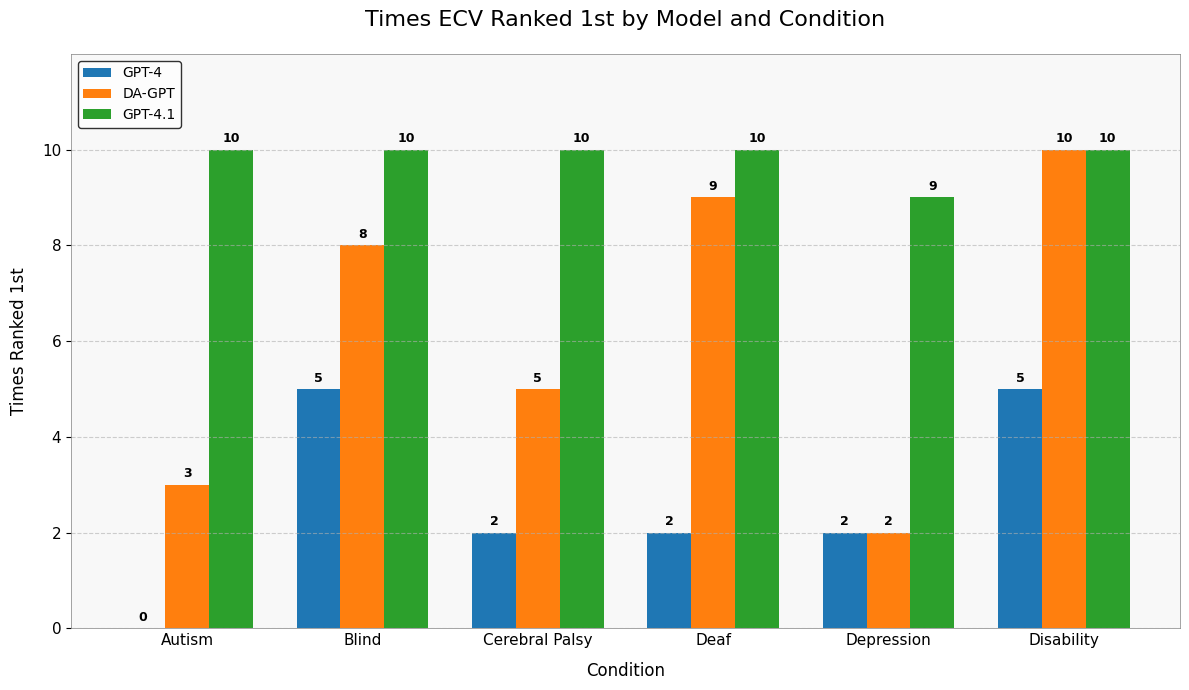

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. Daten definieren
# Hinzufügen des neuen Modells "GPT-4.1" mit Werten von 10 in allen Kategorien.
data = {
    "Condition": [
        "Autism",
        "Blind",
        "Cerebral Palsy",
        "Deaf",
        "Depression",
        "Disability",
    ],
    "GPT-4": [0, 5, 2, 2, 2, 5],
    "DA-GPT": [3, 8, 5, 9, 2, 10],
    "GPT-4.1": [10, 10, 10, 10, 9, 10],
}

df = pd.DataFrame(data)

# 2. Diagramm erstellen
fig, ax = plt.subplots(
    figsize=(12, 7)
)  # Diagrammgröße leicht vergrößert für mehr Platz

bar_width = 0.25  # Breite der Balken anpassen, da jetzt 3 Balken pro Gruppe
index = np.arange(len(df["Condition"]))  # Positionen der Gruppen auf der X-Achse

# Balken für die drei Modelle zeichnen
# plt.cm.tab10 bietet eine gute Palette von Standardfarben
colors = plt.cm.tab10.colors

bar1 = ax.bar(
    index - bar_width, df["GPT-4"], bar_width, label="GPT-4", color=colors[0]
)  # Erste Farbe aus der Palette
bar2 = ax.bar(
    index, df["DA-GPT"], bar_width, label="DA-GPT", color=colors[1]
)  # Zweite Farbe
bar3 = ax.bar(
    index + bar_width, df["GPT-4.1"], bar_width, label="GPT-4.1", color=colors[2]
)  # Dritte Farbe

# 3. Beschriftungen, Titel und Legende hinzufügen
ax.set_xlabel(
    "Condition", fontsize=12, labelpad=10
)  # X-Achsen-Beschriftung hinzugefügt
ax.set_ylabel(
    "Times Ranked 1st", fontsize=12, labelpad=10
)  # Y-Achsen-Beschriftung hinzugefügt
ax.set_title(
    "Times ECV Ranked 1st by Model and Condition", fontsize=16, pad=20
)  # Titel präzisiert und Abstand erhöht

ax.set_xticks(index)
ax.set_xticklabels(
    df["Condition"], rotation=0, ha="center", fontsize=11
)  # X-Achsen-Labels
ax.tick_params(axis="x", length=0)  # Entfernt kleine Ticks an der X-Achse

ax.set_ylim(0, 12)  # Y-Achse von 0 bis 12 (max Wert ist 10, etwas Puffer)
ax.set_yticks(np.arange(0, 11, 2))  # Y-Achsen-Ticks alle 2 Einheiten
ax.tick_params(axis="y", labelsize=11)  # Y-Achsen-Labelgröße

ax.legend(
    loc="upper left", fontsize=10, frameon=True, edgecolor="black"
)  # Legende oben links, mit Rahmen


# 4. Werte auf den Balken anzeigen
def add_value_labels(ax, bars, color="black"):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(
            f"{int(height)}",
            xy=(bar.get_x() + bar.get_width() / 2, height),
            xytext=(0, 3),  # 3 Punkte vertikaler Offset
            textcoords="offset points",
            ha="center",
            va="bottom",
            fontsize=9,
            color=color,
            weight="bold",
        )


add_value_labels(ax, bar1, color="black")
add_value_labels(ax, bar2, color="black")
add_value_labels(ax, bar3, color="black")

# Optional: Gitterlinien nur auf der Y-Achse
ax.grid(axis="y", linestyle="--", alpha=0.6)

# Hintergrundfarbe des Diagrammbereichs (optional)
ax.set_facecolor("#F8F8F8")
fig.patch.set_facecolor("white")

# Rahmen des Diagramms
for spine in ax.spines.values():
    spine.set_edgecolor("gray")
    spine.set_linewidth(0.5)

plt.tight_layout()  # Anpassung des Layouts
plt.show()
